<a href="https://colab.research.google.com/github/JoskyPon/AI_in_PD/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа 10
## Визуализация данных

Выполнил: Подгайный Александр<br>
Группа: ПИН-б-о-22-1

### Подключение библиотек

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

### Загрузка данных

In [9]:
data_path = "/telecom_churn.csv"
data = pd.read_csv(data_path)
data.head(10)
# data.columns

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### Одиночные признаки
#### Количественные признаки

In [11]:
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

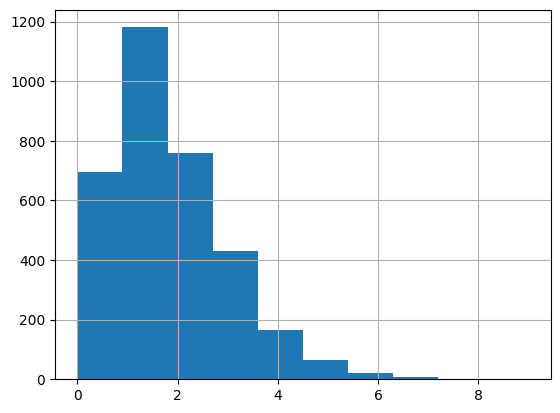

In [14]:
# Применение pandas для визуализации данных
# Pandas работает как настройка над matplotlib
data['customer service calls'].hist();

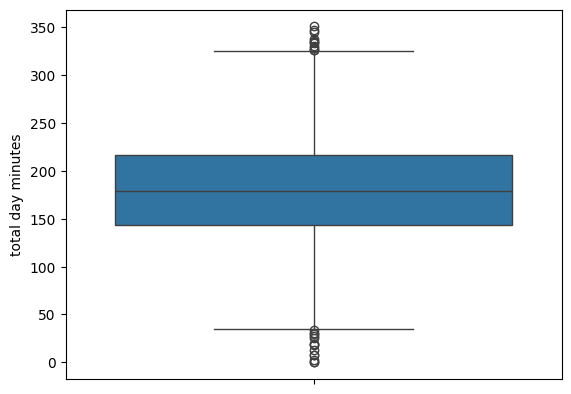

In [16]:
# использование Seaborn
# Построение диаграммы типа "ящик с усами"
# по диаграмме можно определить медиану, квартили,
# интерквартильный размах, выбросы
sns.boxplot(data['total day minutes']);

<ipython-input-20-ddaf413f3e2e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='state',


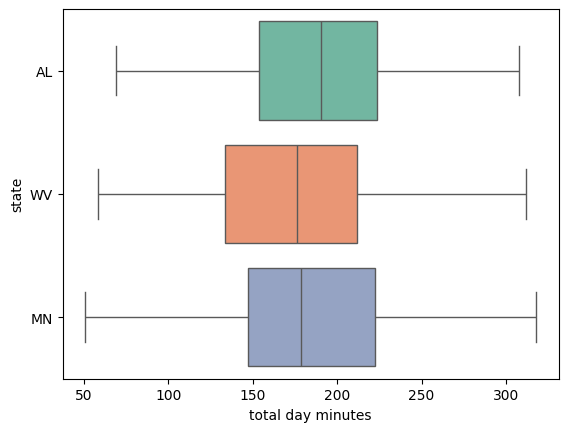

In [20]:
top_data = data[['state','total day minutes']]
top_data = top_data.groupby('state').sum()
top_data = top_data.sort_values('total day minutes',ascending=False)
top_data = top_data[:3].index.values
sns.boxplot(y='state',
            x='total day minutes',
            data=data[data.state.isin(top_data)], palette='Set2');

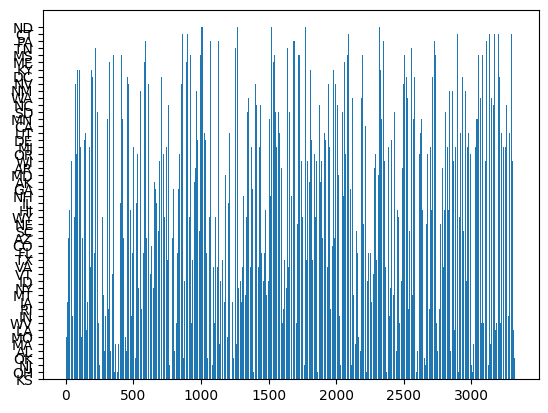

In [21]:
plt.bar(data.index, data['state'])
plt.show()

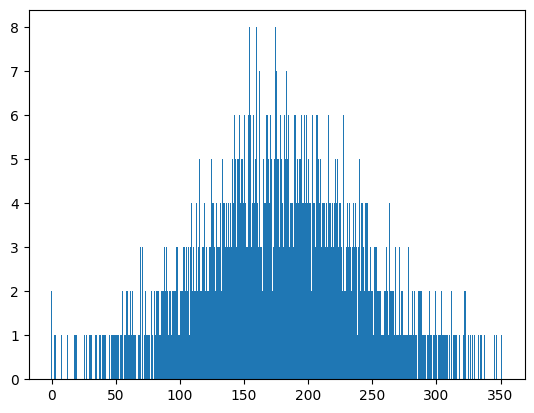

In [22]:
hist = data['total day minutes'].value_counts()
plt.bar(hist.index, hist);

In [23]:
# jn,jh ghbpyfrjd
feats=[f for f in data.columns if 'charge' in f]
feats

['total day charge',
 'total eve charge',
 'total night charge',
 'total intl charge']

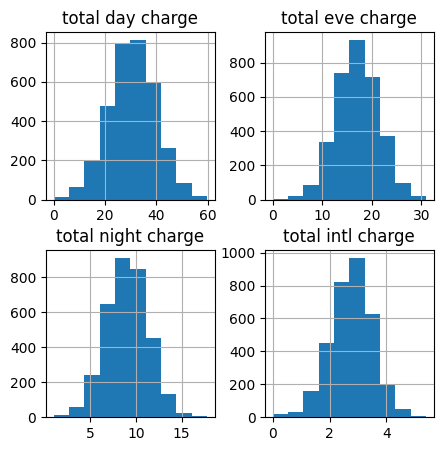

In [24]:
# построение гистограммы для нескольких признаков
data[feats].hist(figsize=(5,5));

### Категориальные признаки

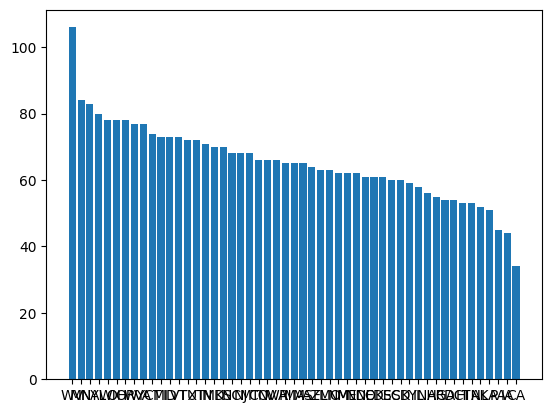

In [25]:
# определение первых n "популярных" штатов
# data['State'].value_counts().head(10)
hist = data['state'].value_counts()
plt.bar(hist.index, hist);


In [26]:
# фактически бинарный признак
data['churn'].value_counts()

,count
churn,
False,2850
True,483


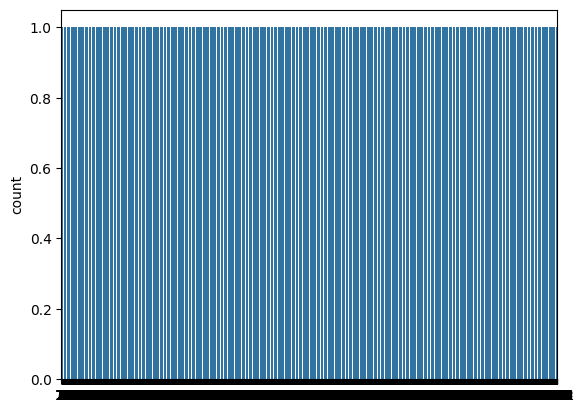

In [27]:
sns.countplot(data['churn']);

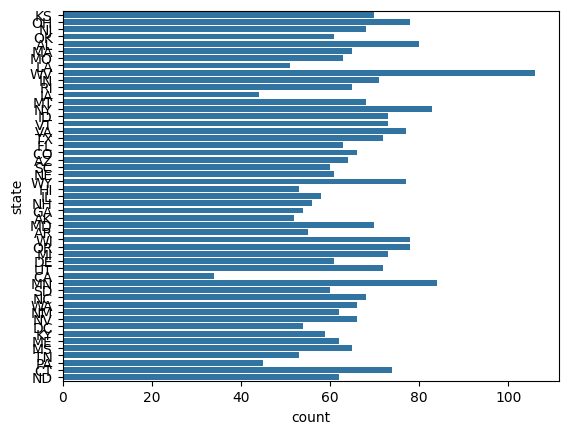

In [28]:
# гистограмма для всех штатов
sns.countplot(data['state']);

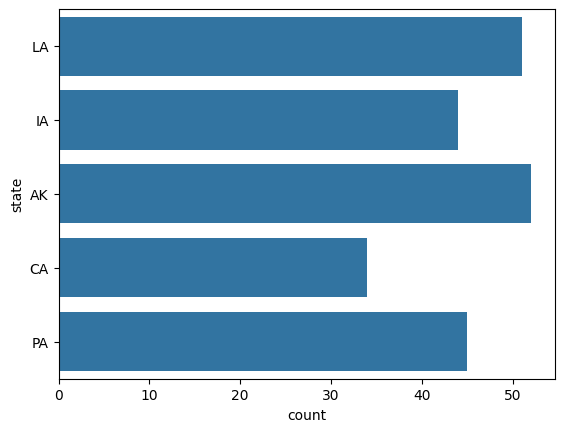

In [29]:
# гистограмма "популярных" штатов
sns.countplot(data[data['state'].isin(data['state'].value_counts().tail(5).index)]['state']);

### Взаимосвязанные признаки
#### Количественный - количественный

In [30]:
# список колонок
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [31]:
# Отбор числовых признаков, содержащих слово 'charge'
feats = [f for f in data.columns if 'charge' in f]
len(feats)
# feats=['Total day calls', 'Total day charge']

4

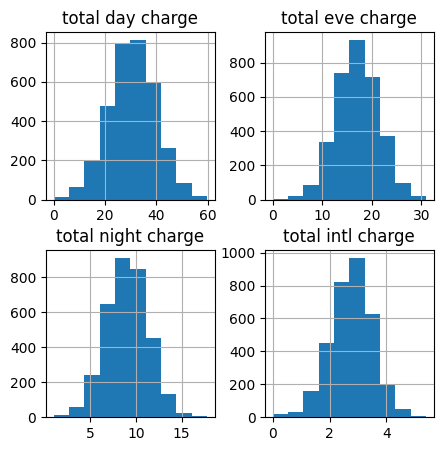

In [32]:
# строим отдельные гистограммы
# для нескольких признаков
data[feats].hist(figsize=(5,5));

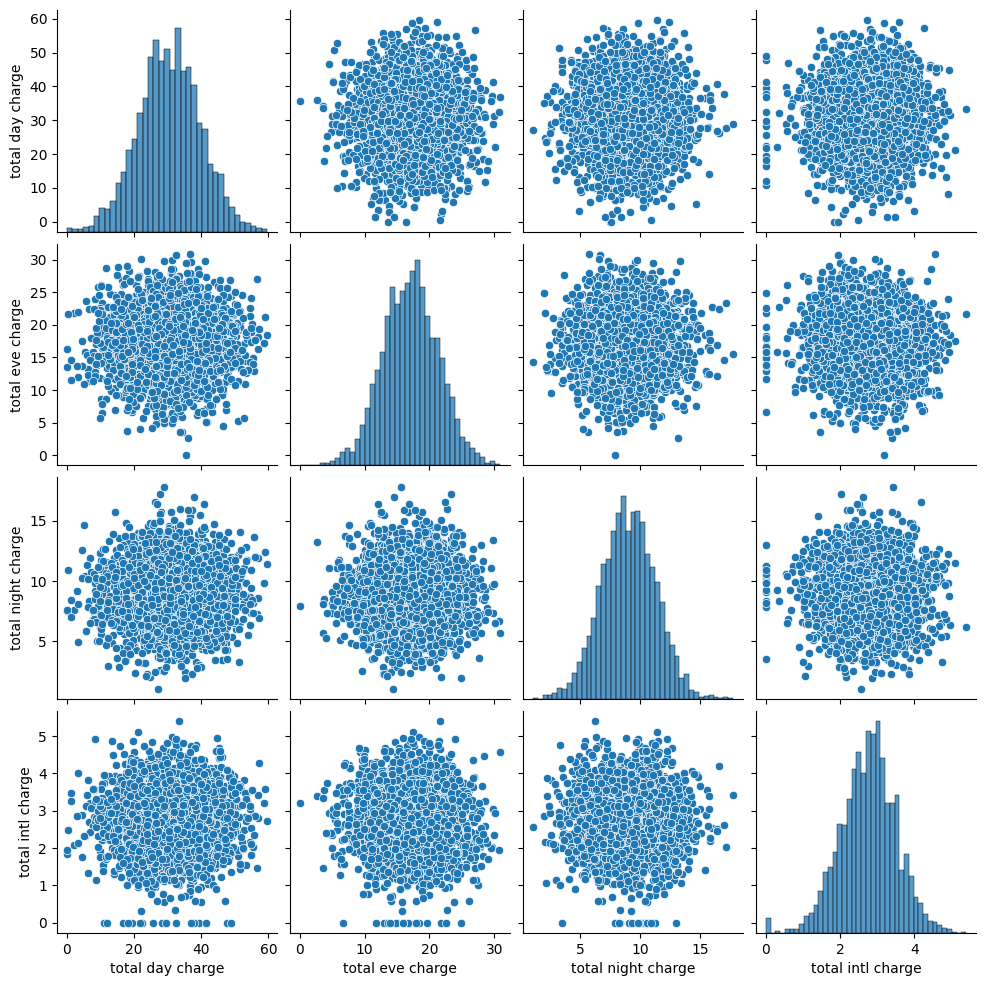

In [33]:
# Попарное распределение признаков
# Применение Seaborn
sns.pairplot(data[feats]);

Можно строить более сложные попарные распределения признаков

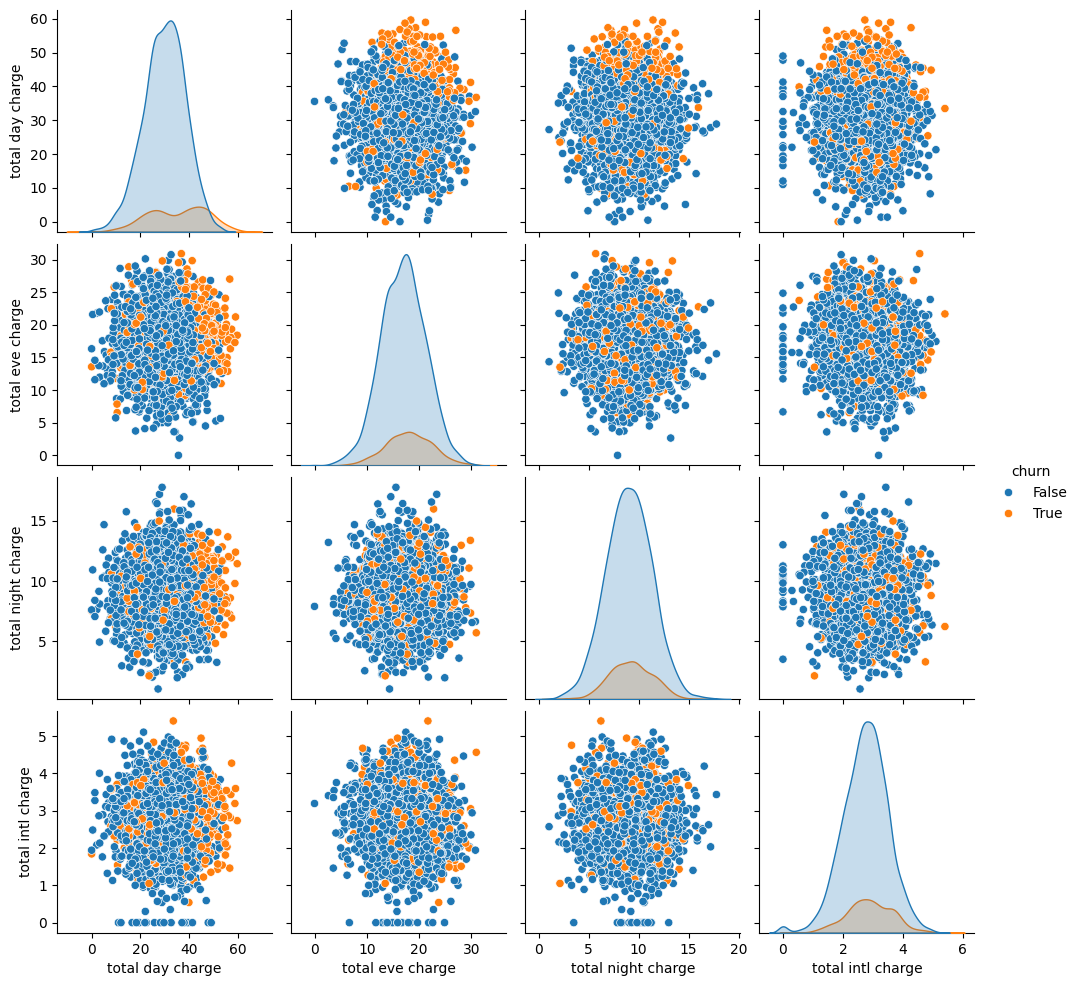

In [36]:
sns.pairplot(data[feats + ['churn']], hue='churn');

Использование matplotlib, подписей данных, заголовков
Использование простейших пользовательских цветов

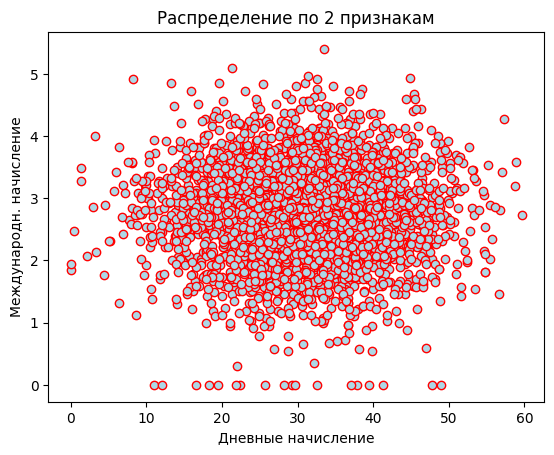

In [39]:
plt.scatter(data['total day charge'],
            data['total intl charge'],
            color='lightblue', edgecolors='red')
plt.xlabel('Дневные начисление')
plt.ylabel('Международн. начисление')
plt.title('Распределение по 2 признакам');

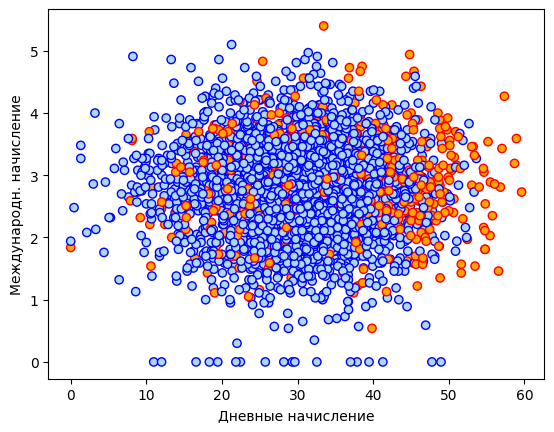

In [40]:
# Раскрашивание данных
# Цвет в зависимости от ухода клиента
c = data['churn'].map({False: 'lightblue', True: 'orange'})
edge_c = data['churn'].map({False: 'blue', True: 'red'})
# Настройка графика
plt.scatter(data['total day charge'], data['total intl charge'],
            color=c, edgecolors=edge_c
           )
plt.xlabel('Дневные начисление')
plt.ylabel('Международн. начисление');

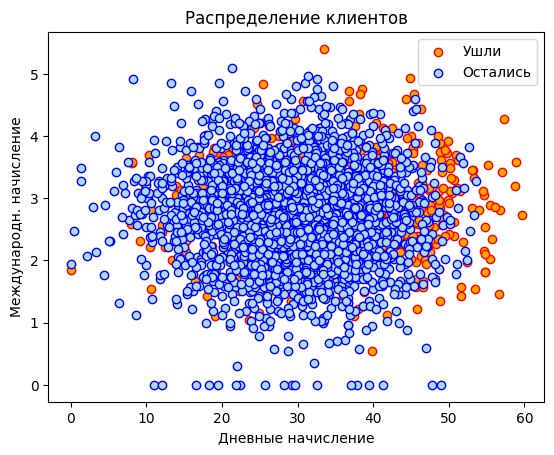

In [41]:
# Раскраска лояльных и ушедших клиентов,
# добавление легенды

# Ушедшие клиенты
data_churn = data[data['churn']]
# Оставшиеся клиенты
data_loyal = data[~data['churn']]

plt.scatter(data_churn['total day charge'],
            data_churn['total intl charge'],
            color='orange',
            edgecolors='red',
            label='Ушли'
           )
plt.scatter(data_loyal['total day charge'],
            data_loyal['total intl charge'],
            color='lightblue',
            edgecolors='blue',
            label='Остались'
           )
plt.xlabel('Дневные начисление')
plt.ylabel('Международн. начисление')
plt.title('Распределение клиентов')
plt.legend();

Контрольные вопросы

1. Какие инструментальные средства используются для организации
рабочего места специалиста Data Science?<br>
Среды разработки и языки программирования, такие как Python и Java, Инструменты для работы с данными: Pandas и NumPy Инструменты для визуализации:Matplotlib и Seaborn и т.д.
2. Какие библиотеки Python используются для работы в области машинного
обучения? Дайте краткую характеристику каждой библиотеке.<br>
Scikit-learn (sklearn) - Основная библиотека для машинного обучения в Python, предоставляющая широкий набор алгоритмов для классификации, регрессии, кластеризации, понижения размерности и многого другого. NumPy - Библиотека для работы с многомерными массивами и математическими операциями. Pandas - Библиотека для анализа данных и манипулирования табличными данными. и т.д.
3. Почему при реализации систем машинного обучения широкое
распространение получили библиотеки Python?<br>
Простота и читаемость: Python обладает простой и понятной синтаксисом, что делает его идеальным для прототипирования и быстрого создания моделей машинного обучения. Богатый набор библиотек: Python обладает огромным количеством специализированных библиотек для машинного обучения. Совместимость с другими инструментами: Python легко интегрируется с другими инструментами и технологиями, используемыми в машинном обучении.
4. Перечислите функции Python, которые были изучены в рамках данной
лабораторной работы и которые используются для визуализации данных.<br>
Базовые библиотеки:
 matplotlib:  Основа для многих других библиотек визуализации, предлагает базовые графики, такие как гистограммы, точечные диаграммы, линейные графики, и позволяет создавать собственные графики с помощью API на основе объектно-ориентированного программирования.
 seaborn:  Построена на базе matplotlib, предоставляет более высокую степень абстракции и стилизации, упрощая создание привлекательных и информативных графиков.
 pyplot:  Интерфейс matplotlib, ориентированный на процедурное программирование, предлагает более простые и интуитивные функции для быстрого создания графиков.
 Библиотеки для сложной визуализации:
 plotly:  Создает интерактивные и динамические графики, которые можно легко использовать в веб-приложениях.
 bokeh:  Позволяет создавать интерактивные и визуально привлекательные графики для веб-браузеров.
 altair:  Библиотека с декларативным API, позволяющая создавать графики с помощью языка JSON, фокусируясь на логике визуализации, а не на реализации.
 ggplot2:  Аналог библиотеки ggplot2 из R, предоставляющий мощные возможности для создания сложных графиков с использованием  грамматики графики.
5. Какая библиотека python предназначена для управления наборами данных:
numpy, pandas, sklearn, opencv, matplotlib?<br>
pandas, numpy
6. Какая стратегия является нежелательной при обработке пропусков в
данных?<br>
а) замена пропущенных значений в столбце медианным значением по
данному столбцу;
б) удаление строк, содержащих пропуски в данных;
в) замена пропущенных значений в столбце средним арифметическим
значением по данному столбцу;
г) замена пропущенных значений в столбце наиболее часто встречающимся
значением по данному столбцу;
Удаление строк, содержащих пропуски в данных
7. Обоснуйте ответ на следующую проблему предварительной обработки
данных: имеется независимая категориальная переменная y, которая представляет
собой категориальный признак, опеределнный на домене {C#, Java, Python, R}.
Нужно ли применять к данному целевому признаку OneHotEncoder?<br>
Нет, не нужно, т.к. OneHotEncoder обычно используется для преобразования категориальных признаков в числовые, чтобы их можно было использовать в алгоритмах машинного обучения.  В данном случае y - это уже целевой признак, а не признак, который используется для обучения модели.
8. Поясните принцип разбиения набора данных на обучающую и тестовую
выборку. Какое соотношение «тестовая:обучающая» наиболее оптимально: 20:80,
50:50, 25:75, 5:95, 40:30?<br>
Случайное разбиение: Набор данных делится на две части случайным образом. Это гарантирует, что тестовая выборка будет представлять собой репрезентативную подвыборку исходных данных.
Определение соотношения: Выбор оптимального соотношения между обучающей и тестовой выборками зависит от размера набора данных и типа задачи.
Оптимальное соотношение:
 20:80 (20% тестовая, 80% обучающая): Это наиболее часто используемое соотношение. Оно обеспечивает достаточно большой объем обучающей выборки для точного обучения модели и достаточно большой объем тестовой выборки для объективной оценки.
 25:75 (25% тестовая, 75% обучающая):  Подобное соотношение тоже довольно распространено и позволяет получить хорошие результаты.
9. Какой код лучше использовать при загрузке данных из csv-файла?<br>
а) dataset = read_csv(“data.csv”)
б) dataset = import(“data.csv”)
в) dataset = read.csv(“data.csv”)
г) dataset = import.csv(“data.csv”)
д) dataset = read_xls(“data.csv”) <br>
dataset = read_csv(“data.csv”)
